<a href="https://colab.research.google.com/github/adhithiya16/Alzheimer-s-Disease-Detection-Comparative-Deep-Learning-Model-Analysis/blob/main/Adhithiya_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Signal Processing Assignment \-  RV Systems Private Limited**

**Author: ADHITHIYA MS**


Step 1: Upload the provided binary signal file (.dat) and Load the binary data as float64 format

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from google.colab import files

# Upload the provided binary signal file (.dat)
print("Please upload the 'Samples_25_07_24.dat' file:")
uploaded = files.upload()

# Load the binary data as float64
filename = 'Samples_25_07_24.dat'
signal_data = np.frombuffer(uploaded[filename], dtype=np.float64)

print(f"Total samples loaded: {len(signal_data)}")

Please upload the 'Samples_25_07_24.dat' file:


Saving Samples_25_07_24.dat to Samples_25_07_24.dat
Total samples loaded: 24000


Step 2: Define sampling rate and generate time array and Perform Fast Fourier Transform to find frequency components

In [2]:
# Define sampling rate and generate time array
sampling_rate = 30
time_axis = np.arange(len(signal_data)) / sampling_rate

# Compute the Fourier Transform of the signal
fft_values = fft(signal_data)
frequencies = fftfreq(len(signal_data), d=1/sampling_rate)

# Keeping only the positive frequency components
positive_freqs = frequencies[frequencies >= 0]
positive_spectrum = np.abs(fft_values[frequencies >= 0])

Step 3: Plot the frequency spectrum and Identify significant frequencies (those above 10% of max)

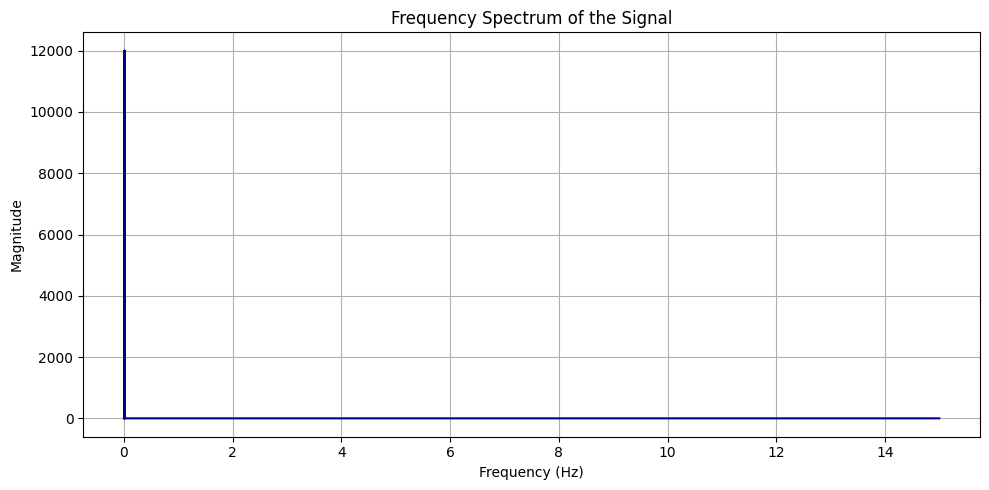

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_spectrum, color='darkblue')
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
threshold = 0.1 * np.max(positive_spectrum)
dominant_freqs = positive_freqs[positive_spectrum > threshold]

print("Dominant Frequencies Present in the Signal (Hz):")
for freq in dominant_freqs:
    print(f"  → {freq:.4f} Hz")

Dominant Frequencies Present in the Signal (Hz):
  → 0.0100 Hz
  → 0.0125 Hz
  → 0.0150 Hz


Step 4: Aliasing Analysis at 24 Hz Sampling and Check if any frequency exceeds the new Nyquist limit

In [5]:
original_nyquist = sampling_rate / 2
new_sampling_rate = 24  # Hz
new_nyquist = new_sampling_rate / 2

print("\nAliasing Check:")
print(f"Original Nyquist limit (30 Hz): {original_nyquist} Hz")
print(f"New Nyquist limit (24 Hz): {new_nyquist} Hz")


Aliasing Check:
Original Nyquist limit (30 Hz): 15.0 Hz
New Nyquist limit (24 Hz): 12.0 Hz


In [8]:
aliased_freqs = dominant_freqs[dominant_freqs > new_nyquist]

if len(aliased_freqs) > 0:
    print("Aliasing will occur for the following frequencies:")
    for f in aliased_freqs:
        alias_freq = abs(f - new_sampling_rate * round(f / new_sampling_rate))
        print(f"  - {f:.4f} Hz aliases to {alias_freq:.4f} Hz")
else:
    print("No aliasing occurs when sampled at 24 Hz.")

No aliasing occurs when sampled at 24 Hz.


Step 5: Finally will be Sampling Rate Summary

In [9]:
print(f"\nNumber of samples per second (Sampling Rate): {sampling_rate} Hz")


Number of samples per second (Sampling Rate): 30 Hz
